Preface:
Throughout my schooling years, I've always been fascinated by the way data can narrate a compelling story. In my middle school lessons, we were taught to generalise a linear relationship with data with formula y=mx+b, where m denotes the slope and b the y-intercept. To find the parameters to this formila ypically involved selecting two points, often the first and last data points given, to calculate the slope and y-intercept. However, I've often pondered the accuracy of this approach and sought out alternative methods.

After conducting thorough research, I came across the idea of delving into the fundamentals of linear algebra, particularly utilizing matrices and single value decomposition (SVD), as a promising avenue to achieve a more precise estimation of these parameters. Additionally, I became fascinated by the potential of employing machine learning techniques, specifically supervised learning, to develop and refine a model that closely aligns with the observed data points. This exploration aims to delve into these concepts, elucidating their underlying principles, and showcasing the efficacy of supervised machine learning in identifying an optimal model.

Methodology:
The data that will be used is developed randomly by the PyTorch library, where a tensor with 50 x values is created. Using the torch.normal method, 50 corresponding y-values will be created with input parameters m = 5, and b = 10 with standard deviation of 0.2 at random (The parameters have been chosen at random). With our values set, linear algebra concepts will be employed to determine the most accurate estimators for our parameters m and b. Furthermore a 4-step machine learning process is employed to find estimates for our parameters.

In [143]:
import torch
import numpy as np
import matplotlib.pyplot as plt
#we will create a random tensor to be the x values of the dataset of 50 values 
random_x_tensor = torch.FloatTensor(1, 50).uniform_(-1, 1) * 100
#save the random tensor we have created in a new tensor called x_tensor
x_tensor = random_x_tensor
x_array = x_tensor.numpy()

#create the y_tensor
y_tensor = 5*x_tensor + 10 + torch.normal(mean=torch.zeros(50), std=30)
y_array = y_tensor.numpy()

x_array = x_array.transpose()
y_array = y_array.transpose()
print(x_array)
print(y_array)

[[ 81.997086 ]
 [ 19.035685 ]
 [ 15.662348 ]
 [-50.325977 ]
 [ 19.342518 ]
 [-59.507706 ]
 [-42.676235 ]
 [ 88.747574 ]
 [ 88.63481  ]
 [  6.011927 ]
 [-81.7428   ]
 [-25.61282  ]
 [-11.746967 ]
 [  4.7865987]
 [ 63.83966  ]
 [ 67.27413  ]
 [-90.44524  ]
 [ 86.5177   ]
 [ 48.276554 ]
 [-81.22361  ]
 [ 79.08365  ]
 [ 76.773476 ]
 [-22.120428 ]
 [ 94.05045  ]
 [-82.35158  ]
 [-68.04193  ]
 [-90.8119   ]
 [ 55.689846 ]
 [-35.73278  ]
 [ 70.09648  ]
 [-44.553387 ]
 [-36.30136  ]
 [-57.069935 ]
 [-54.055153 ]
 [-49.289368 ]
 [ 59.981762 ]
 [ -5.7097673]
 [-22.164202 ]
 [ 34.117043 ]
 [ 12.444139 ]
 [ 10.078585 ]
 [ 77.609276 ]
 [ 63.348736 ]
 [ 74.91673  ]
 [-35.831295 ]
 [-86.47671  ]
 [-78.592834 ]
 [ -4.254329 ]
 [ 60.184704 ]
 [-48.71631  ]]
[[ 391.36575 ]
 [  75.74141 ]
 [  33.22391 ]
 [-267.50378 ]
 [ 130.66022 ]
 [-280.83762 ]
 [-225.25766 ]
 [ 422.2279  ]
 [ 534.26044 ]
 [  55.876575]
 [-345.12015 ]
 [ -38.919106]
 [ -41.088505]
 [  44.139427]
 [ 342.53445 ]
 [ 383.7994  ]
 [-456.67

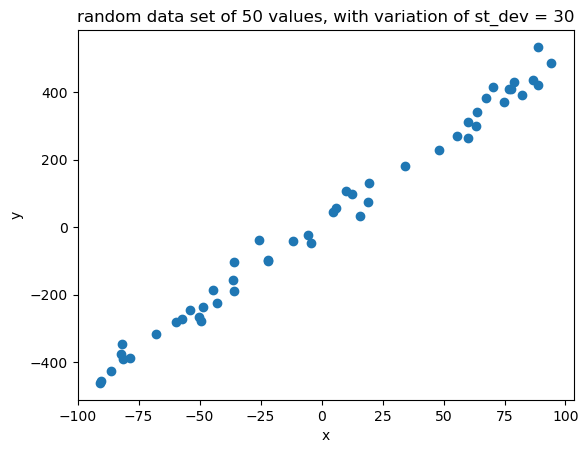

In [144]:
#Plot the relationship betweeen x and y for a visual representation
fig, ax = plt.subplots()
plt.title("random data set of 50 values, with variation of st_dev = 30")
plt.xlabel("x")
plt.ylabel("y")
ax.scatter(x_tensor, y_tensor)

Linear Algebra:
Using linear algebra to find the most accurate predictors for our parameters m,b will use the concept of singular value decomposition.
This concept builds upon 2 foundational ideas in linear algebra which is matrix algebra and decomposition. 
The way the matrices can be set-up will be expressed as y = xp, where y is the output matrix, x is the input matrix and p is the matrix for parameters. we need to solve for p.

<img src = "matrix.png" width="150">

Using the inverse of matrix x has allowed us to isolate the matrix p with our parameters.
Therefore, to find the values of m and b which reside in matrix p, we need to multiply the inverse of x with y. Below, is an example of the matrices are setup in the system

Here is an example with values to present the relationship between the matrices.

<img src = "1initial.png" width="205">

The first column of x is multiplied with m, and the second column is multiplied by b. For example, the first row multiplication produces 2 = 43m + b, hence showing the matrix multiplication system produces the correct system to find m and b. 

Here is now the inverse multiplication of x with y to isolate the parameter matrix p.

<img src = "1inverse.png" width="205">





To compute the inverse of matrix x, we are unable to employ the concept of eigendecomposition as that concept can only be applied to square matrices. However, the solution to this barrier is the Moore-Penrose Pseuodoinverse. The following notation will walk through the pseudoinverse. 

<img src = "pseudo.png" width="500">

Before we get into calculating the pseudoinverse, lets spend some time grasping the concept of Singular Value Decomposition (SVD) and what it does. As the pseudoinverse is calculated, it uses components of the SVD of the matrix X.

In essence, SVD provides a way to decompose a matrix into simpler components, which facilitates the calculation of the pseudoinverse. The steps to caluclate the pseudoinverse are:
- Decompose the matrix into its SVD: U, V, D
- Construct the Moore-Penrose Pseudoinverse by finding V^+ and D transposed

SVD is similar to Eigendecomposition in the manner in which it takes a large matrix and breaks it down into 3 smaller matrices, U, V, D.
In essence it breaks the matrices into:
- Important Directions (Singular Vectors): It identifies the directions in which the most important information in the matrix is concentrated. 
- Importance of Directions (Singular Values): It determines how important each of these directions is. This importance is quantified by singular values.


- U and V are the singular vectors which are orthornmal matrices which contain vectors which are linearly independent to each other. 




In [145]:
#We need to add a column of ones to the x_array so the matrix multiplication of the system of linear equations can be satisfied.

#this gives us 1 row of ones, but we need one column so we will transpose and concatenate it to the x_array
x_array = np.insert(x_array, x_array.shape[1], 1, axis=1)
print(x_array)
U, d, VT = np.linalg.svd(x_array)

print(U)
print(d)
print(VT)

[[ 81.997086    1.       ]
 [ 19.035685    1.       ]
 [ 15.662348    1.       ]
 [-50.325977    1.       ]
 [ 19.342518    1.       ]
 [-59.507706    1.       ]
 [-42.676235    1.       ]
 [ 88.747574    1.       ]
 [ 88.63481     1.       ]
 [  6.011927    1.       ]
 [-81.7428      1.       ]
 [-25.61282     1.       ]
 [-11.746967    1.       ]
 [  4.7865987   1.       ]
 [ 63.83966     1.       ]
 [ 67.27413     1.       ]
 [-90.44524     1.       ]
 [ 86.5177      1.       ]
 [ 48.276554    1.       ]
 [-81.22361     1.       ]
 [ 79.08365     1.       ]
 [ 76.773476    1.       ]
 [-22.120428    1.       ]
 [ 94.05045     1.       ]
 [-82.35158     1.       ]
 [-68.04193     1.       ]
 [-90.8119      1.       ]
 [ 55.689846    1.       ]
 [-35.73278     1.       ]
 [ 70.09648     1.       ]
 [-44.553387    1.       ]
 [-36.30136     1.       ]
 [-57.069935    1.       ]
 [-54.055153    1.       ]
 [-49.289368    1.       ]
 [ 59.981762    1.       ]
 [ -5.7097673   1.       ]
 

Now we have V, D and U. We need to find U transposed and D plus.
U transposed is simple to find by using the numpy method .transpose()
However, to find D plus we need to compute the reciprocal of all the non-zero elements transposed.
Since D is a matrix with values of 1 row, we need to diagonalise, invert and then concatenate it with columns of zeros so it has the same shape as X transposed for V * Dplus * UT matrix multiplication to be possible as the number of columns in D plus need to equal the number of rows in X transposed.

In [146]:
UT = U.transpose()

d_diag = np.diag(d)

d_inv = np.linalg.inv(d_diag)

d_plus = np.concatenate((d_inv, np.array([[0, 0]  *25 ]).T), axis=1)
print(d_plus)


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 2 and the array at index 1 has size 50

Now we have all the elements to calculate the Moore-penrose pseudoinverse which is through
V, Dplus and UT.

In [ ]:
x_plus = np.dot(VT.T, np.dot(d_plus, UT))

ValueError: shapes (2,3) and (50,50) not aligned: 3 (dim 1) != 50 (dim 0)

In [ ]:
inverse = np.linalg.pinv(x_array)
print(inverse)

[[-3.80874088e-04 -2.52009369e-04  1.14996408e-04  1.87306898e-04
  -1.05909414e-04 -4.17810516e-04  1.49369633e-04  6.05438108e-05
  -3.26567504e-04  3.22667038e-04  3.47685069e-04  3.55552067e-04
   1.04531682e-04  9.98832984e-05 -5.31721395e-04 -2.62778136e-04
  -5.99102641e-04 -2.92110984e-04 -2.28119505e-04  4.20948112e-04
   2.63264548e-04  5.38564927e-04  4.51952219e-05 -3.22847103e-04
   3.06313850e-05 -6.25100685e-04  4.55084082e-04 -6.75742223e-04
  -2.75780280e-06  4.12644586e-04  5.34463325e-04  2.40969763e-04
   4.74866509e-04  1.47634200e-04 -4.72102984e-04  7.00208417e-04
  -2.54549610e-04 -3.93436989e-04 -2.04139782e-04  8.93692195e-05
  -6.31559233e-05  1.12331429e-04  6.97145239e-04  1.38493502e-04
   2.59422784e-04  2.11221355e-04  7.86819845e-04 -5.06239361e-04
  -7.17039686e-04 -6.67698914e-04]
 [ 1.78412478e-02  1.85716376e-02  2.06517857e-02  2.10616328e-02
   1.93997156e-02  1.76318958e-02  2.08466072e-02  2.03431528e-02
   1.81490500e-02  2.18288377e-02  2.1970

In [ ]:
m = np.dot(inverse, y_array)
print(m)

[[5.0823307]
 [9.034594 ]]


Here, we can see that our method produces approximately 5.08 as the gradient (m parameter) and 9.03 as the y intercept (b parameter). Hence using this method we are able to see that this is the most accurate estimator for a line of best fit for a linear relationship between 2 variables. As we have the information, we can use calculus in machine learning to aid in finding the line of best fit through incremental changes.

We will use gradient descent as our tool of the Reinforcement Machine Learning method to optimise the parameters m and b. Simply put, reinforcement learning involves training a model to make decisions by finding the most optimal result. The training process involves a trial and error method until the most optimal result is found. Therefore, in the case it would be predicting the most accurate values for parameters m and b for the equation of a line.

The 5 step process is:
Initialising Parameters: Start by assigning random values to the parameters we are trying to predict.

Forward Propagation: Use these parameters to predict the output values.


Calculate Cost: Compare the actual output value with the predicted output values. The cost function measures how far off the predictions are from the actual values.

Backpropagation (computing the gradient of cost): Find the partial derivatives of the cost function with respect to each of the parameters. This is done using the chain rule of calculus.

Parameter Update: Use gradient descent to update the values of the parameters. Adjust the parameters in the direction that minimizes the cost function. This is done by subtracting a fraction of the gradient from the parameters.

This process iterates until the cost function reaches a minimum, or at least until it converges satisfactorily. Through this iterative process, the model gradually learns the best parameters to make accurate predictions for m and b.

<img src = "ml steps.png" width="500">


Before we start machine learning, we will manually compute each step of the process to visualise each step of how the model learns.
Note that Pytorch will be used to implement the machine learning process.

In [ ]:
#lets create some functions to simplify the code below
#Lets use a function called regression to compute output Y
def regression(x, m, b):
    y = m*x + b
    return y

#Lets also plot our data points and produce what the random values of m and b look like
def plot(x, y, m, b):
    fig, ax = plt.subplots()
    ax.scatter(x, y)
    
    x_min, x_max = ax.get_xlim()
    y_min = regression(x_min, m, b).detach().item()
    y_max = regression(x_max, m, b).detach().item()
    
    ax.set_xlim([x, x_max])
    _ = ax.plot([x_min, x_max], [y_min, y_max])

Step 1: Using random values for m and b.
For this example lets use - 5 for m and - 10 for b.

Step 2: Do a forward pass (calculate the y value using the random values for parameters we picked).
Using m = -5 and b = -10 for the 50 x values to create an array of predicted y values called y_hat

In [ ]:
#implementing Step 2
#we treat m and b as tensors as we will be treating them as scalar tensors to conduct operations on the vector tensors on x_
m = torch.tensor([-5]).requires_grad_()
#We use the requires_grad_() method which we use to tell PyTorch that we want to calculate gradients with respect to that variable at that value.
b = torch.tensor([-10]).requires_grad_()
#


